In [1]:
#http://www.nlpr.ia.ac.cn/databases/handwriting/Download.html
%matplotlib inline
import numpy as np
import matplotlib.pylab as pylab
from matplotlib import rc
rc('font', **{'sans-serif' : 'Arial',
                       'family' : 'sans-serif'})


chinese_font_filename = "WenQuanYi Micro Hei.ttf"

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
chinese_font = FontProperties(fname = chinese_font_filename)

In [2]:
import re
import struct

def load_feature_data(name):
    with open('data/{}.mpf'.format(name),'rb') as input_file:
        c = input_file.read()
    return c

def parse_feature_data(data):
    header_length = struct.unpack('I',data[0:4])[0]
    format_code = ''.join(struct.unpack('8s',data[4:12]))
    description = ""
    p = 12
    while ord(data[p]) != 0:
        description+=data[p]
        p+=1
    p+=1
    code_type = struct.unpack('20c',data[p:p+20])
    p+=20
    code_length = struct.unpack('H',data[p:p+2])[0]
    p+=2
    data_type = str(b''.join(struct.unpack('20c',data[p:p+20])))
    p+=20
    sample_number = struct.unpack('I',data[p:p+4])[0]
    p+=4
    dimensionality = struct.unpack('I',data[p:p+4])[0]
    print dimensionality
    p+=4
    if data_type[:13] == 'unsigned char':
        unpack_number = lambda d, p: (1,struct.unpack('B',d[p:p+1])[0])
    else:
        print len(data_type)
        raise ValueError
    while p < len(data):
        label = struct.unpack('H',data[p:p+code_length])[0]
        v = []
        i = 0
        while i < dimensionality: 
            dp, number = unpack_number(data,p)
            v.append(number)
            p+=dp   
            i+=1
        return label,v
    return

In [3]:
import re
import struct

def load_image_data(name):
    with open('data/{}.gnt'.format(name),'rb') as input_file:
        c = input_file.read()
    return c

def parse_image_data(data):
    p=0
    samples = []
    while p < len(data):
        sample_size = struct.unpack('I',data[p:p+4])[0]
        p+=4
        tag_code = struct.unpack('>H',data[p:p+2])[0]
        p+=2
        width = struct.unpack('H',data[p:p+2])[0]
        p+=2
        height = struct.unpack('H',data[p:p+2])[0]
        p+=2
        i = 0
        v = []
        image = np.zeros((width,height),dtype=np.uint8)
        while i < width*height:
            number = struct.unpack('B',data[p])[0]
            image[i%width,i//width] = number
            i+=1
            p+=1
        samples.append((tag_code,image))
    return samples

In [4]:
from collections import defaultdict
character_samples = defaultdict(list)
import os
test_files = os.listdir('data/competition')
for test_file in test_files:
    if test_file.endswith('.gnt'):
        c = load_image_data('competition/'+test_file[:-4])
        samples = parse_image_data(c)
        for tag,image in samples:
            character_samples[tag].append(image)

In [8]:
samples = parse_image_data(c)

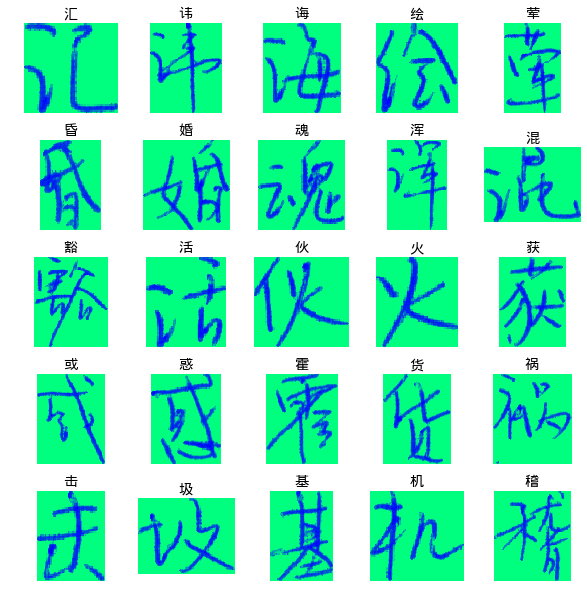

In [9]:
#http://stackoverflow.com/questions/379191/convert-gb2312-to-utf-8
pylab.winter()
fig = pylab.figure(figsize=(10,10))
n=5
for i in range(n):
    for j in range(n):
        k = i*n+j
        pylab.subplot(n,n,k+1)
        pylab.imshow(np.transpose(samples[1100+k][1]),interpolation='nearest')
        pylab.axis('off')
        pylab.title(struct.pack('>H',samples[1100+k][0]).decode('CP936'),fontproperties=chinese_font,size='x-large')
fig.subplots_adjust(hspace=0.3)

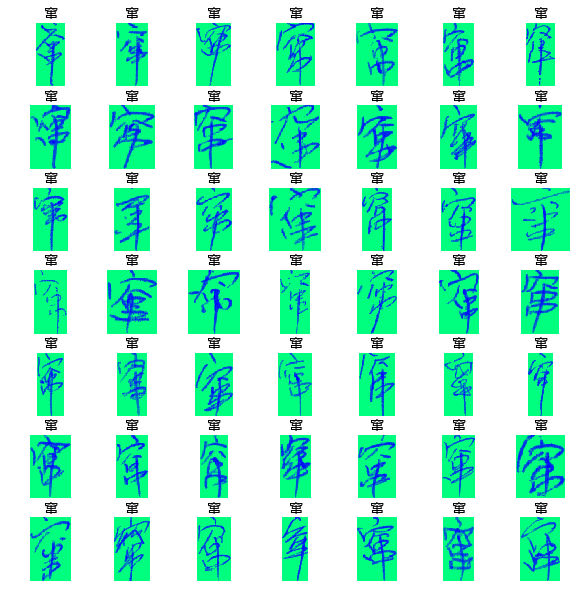

In [12]:
#http://stackoverflow.com/questions/379191/convert-gb2312-to-utf-8
pylab.winter()
fig = pylab.figure(figsize=(10,10))
n=7
key = character_samples.keys()[3410]
samples = character_samples[key]
for i in range(n):
    for j in range(n):
        k = i*n+j
        pylab.subplot(n,n,k+1)
        pylab.imshow(np.transpose(samples[k]),interpolation='nearest')
        pylab.axis('off')
        pylab.title(struct.pack('>H',key).decode('CP936'),fontproperties=chinese_font,size='x-large')
fig.subplots_adjust(hspace=0.3)